In [1]:
# 📚 Entrenamiento de Red Neuronal CNN para clasificación multiclase

# 🔧 Cargar librerías
import os
import sys
import yaml
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model

In [2]:
# Ajustar path para importar módulos locales
sys.path.append("../src")
import model
import utils
import train

In [3]:
# 🔧 Cargar configuración
with open("../config.yaml", "r") as f:
    config = yaml.safe_load(f)

img_height = config["image"]["height"]
img_width = config["image"]["width"]
batch_size = config["training"]["batch_size"]
epochs = config["training"]["epochs"]
data_path = config["paths"]["prepared_data"]
model_path = config["paths"]["model"]

In [4]:
# 📦 Cargar datos
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    os.path.join(data_path, "train"),
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical"
)

val_generator = val_datagen.flow_from_directory(
    os.path.join(data_path, "val"),
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical"
)

Found 1594 images belonging to 54 classes.
Found 355 images belonging to 54 classes.


In [5]:
# ✅ Verificar consistencia de clases
assert train_generator.class_indices == val_generator.class_indices
num_classes = len(train_generator.class_indices)

In [6]:
# 🧠 Construir modelo
cnn_model = model.build_model(config, num_classes)

cnn_model.summary()

/Users/saolivap/.pyenv/versions/3.11.9/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 54)             │         6,966 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 690,166 (2.63 MB)

 Trainable params: 690,166 (2.63 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# 🏋️ Entrenar el modelo
callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True),
    ModelCheckpoint(model_path, save_best_only=True)
]

history = cnn_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs,
    callbacks=callbacks
)

Epoch 1/20


/Users/saolivap/.pyenv/versions/3.11.9/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.0202 - loss: 4.3424 - val_accuracy: 0.0282 - val_loss: 4.2107
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.0531 - loss: 4.0199 - val_accuracy: 0.0592 - val_loss: 3.8992
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.0927 - loss: 3.5687 - val_accuracy: 0.0789 - val_loss: 3.5997
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.1483 - loss: 3.2225 - val_accuracy: 0.1211 - val_loss: 3.2983
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.1842 - loss: 3.0040 - val_accuracy: 0.1521 - val_loss: 3.1622
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.2076 - loss: 2.8550 - val_accuracy: 0.1521 - val_loss: 3.0119
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.2455 - loss: 2.6126 - val_accuracy: 0.2366 - val_loss: 2.6839
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.2870 - loss: 2.3436 - val_accuracy: 0.2282 - val_loss: 2.

In [8]:
# 💾 Guardar modelo
cnn_model.save(model_path)

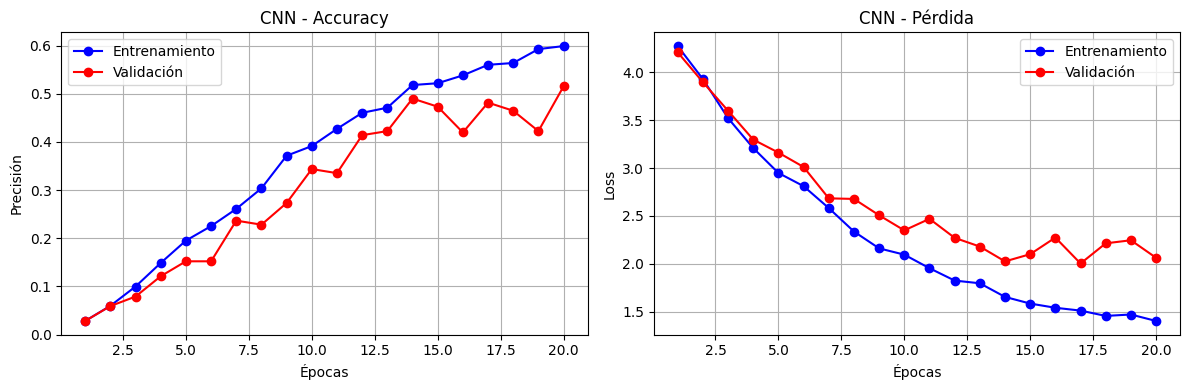

In [9]:
# 📈 Graficar historia de entrenamiento
utils.plot_training_history(history, model_name="CNN")

In [10]:
# ✅ Guardar nombres de clases para uso posterior
with open("class_indices.yaml", "w") as f:
    yaml.dump(train_generator.class_indices, f)